# Load & Info & Data Preprocessing

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
X = pd.read_csv('../data/Airbnb_xtrain_v4.csv')
y = pd.read_csv('../data/Airbnb_ytrain_v5.csv')

In [59]:
y = y.drop(columns=['Unnamed: 0'])

In [60]:
#Checking null values
X.isnull().sum()

Unnamed: 0                     0
most_frequent_secs_elapsed     0
age                            0
most_frequent_action           0
most_frequent_action_detail    0
first_browser                  0
gender                         0
most_frequent_action_type      0
affiliate_channel              0
most_frequent_device_type      0
first_device_type              0
first_affiliate_tracked        0
language                       0
signup_method                  0
affiliate_provider             0
signup_app                     0
signup_flow                    0
dtype: int64

In [61]:
X = X.dropna()

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 17)

In [63]:
print(X_train.dtypes)

Unnamed: 0                       int64
most_frequent_secs_elapsed     float64
age                              int64
most_frequent_action             int64
most_frequent_action_detail      int64
first_browser                    int64
gender                           int64
most_frequent_action_type        int64
affiliate_channel                int64
most_frequent_device_type        int64
first_device_type                int64
first_affiliate_tracked          int64
language                         int64
signup_method                    int64
affiliate_provider               int64
signup_app                       int64
signup_flow                      int64
dtype: object


In [64]:
print(y_train.dtypes)

0    int64
dtype: object


# selector1

In [65]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k=100)
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [66]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

## selector2

We need to convert "country_destination" to int

In [67]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [68]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k='all')
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['Unnamed: 0', 'most_frequent_secs_elapsed', 'age',
       'most_frequent_action', 'most_frequent_action_detail', 'first_browser',
       'gender', 'most_frequent_action_type', 'affiliate_channel',
       'most_frequent_device_type', 'first_device_type',
       'first_affiliate_tracked', 'language', 'signup_method',
       'affiliate_provider', 'signup_app', 'signup_flow'],
      dtype='object')


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Selected

In [69]:
selected_feature_names

Index(['Unnamed: 0', 'most_frequent_secs_elapsed', 'age',
       'most_frequent_action', 'most_frequent_action_detail', 'first_browser',
       'gender', 'most_frequent_action_type', 'affiliate_channel',
       'most_frequent_device_type', 'first_device_type',
       'first_affiliate_tracked', 'language', 'signup_method',
       'affiliate_provider', 'signup_app', 'signup_flow'],
      dtype='object')

In [70]:
X = X[selected_feature_names]

In [71]:
X

,Unnamed: 0,most_frequent_secs_elapsed,age,most_frequent_action,most_frequent_action_detail,first_browser,gender,most_frequent_action_type,affiliate_channel,most_frequent_device_type,first_device_type,first_affiliate_tracked,language,signup_method,affiliate_provider,signup_app,signup_flow
0,0,2.0,62,114,75,6,2,3,6,8,6,3,5,0,7,2,0
1,1,0.0,32,22,14,17,1,4,7,10,7,0,5,1,7,2,0
2,2,37.0,19,87,75,23,0,3,5,6,3,6,5,0,7,2,0
3,3,149.0,25,114,75,6,2,2,2,6,3,6,5,0,3,2,0
4,4,387.0,32,22,0,17,1,6,2,11,7,6,5,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40790,40790,1.0,34,110,73,6,1,7,2,6,3,0,5,0,3,2,0
40791,40791,78.0,36,114,73,23,1,7,5,6,3,0,5,0,7,2,0
40792,40792,29.0,23,110,73,11,1,3,5,8,6,3,5,0,7,2,0
40793,40793,584.0,32,110,0,23,2,7,5,6,3,3,5,0,7,2,0


In [72]:
y

,0
0,11
1,10
2,11
3,7
4,10
...,...
40790,3
40791,10
40792,10
40793,7


<Axes: >

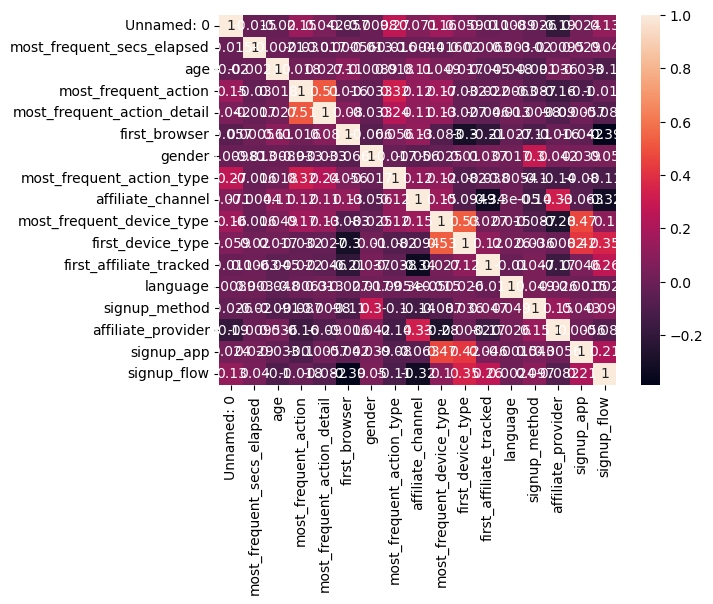

In [73]:
sns.heatmap(X.corr(), annot= True)

In [74]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 17)

# Fiting

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# Accuracy

In [76]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}") 

Accuracy: 0.46


### Compare
0.46 : all
0.54 : 10
0.54 : 5
0.54 : 2

# Predict

In [77]:
X.head()

,Unnamed: 0,most_frequent_secs_elapsed,age,most_frequent_action,most_frequent_action_detail,first_browser,gender,most_frequent_action_type,affiliate_channel,most_frequent_device_type,first_device_type,first_affiliate_tracked,language,signup_method,affiliate_provider,signup_app,signup_flow
0,0,2.0,62,114,75,6,2,3,6,8,6,3,5,0,7,2,0
1,1,0.0,32,22,14,17,1,4,7,10,7,0,5,1,7,2,0
2,2,37.0,19,87,75,23,0,3,5,6,3,6,5,0,7,2,0
3,3,149.0,25,114,75,6,2,2,2,6,3,6,5,0,3,2,0
4,4,387.0,32,22,0,17,1,6,2,11,7,6,5,1,3,2,0


In [78]:
y

,0
0,11
1,10
2,11
3,7
4,10
...,...
40790,3
40791,10
40792,10
40793,7


In [79]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Visualize

In [80]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[   0    0    0    0    0    0    0   30    0    0   12    0]
 [   0    0    0    0    0    0    0   92    0    0   30    0]
 [   0    0    0    0    0    0    0   60    0    0   24    0]
 [   0    0    0    0    0    0    0  147    0    0   52    0]
 [   0    0    0    0    0    0    0  320    0    0   85    0]
 [   0    0    0    0    0    0    0  165    0    0   38    0]
 [   0    0    0    0    0    0    0  196    0    0   47    0]
 [   0    0    0    0    0    0    0 5890    0    0 1539    0]
 [   0    0    0    0    0    0    0   61    0    0   18    0]
 [   0    0    0    0    0    0    0   11    0    0    5    0]
 [   0    0    0    0    0    0    0 4921    0    0 1582    0]
 [   0    0    0    0    0    0    0  755    0    0  238    0]]


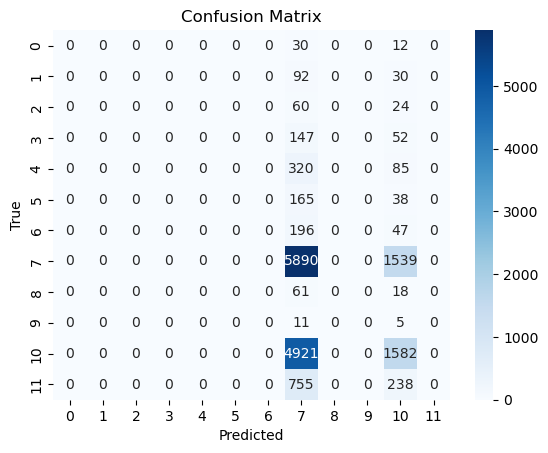

In [81]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Submission

### data

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/Airbnb_xtest_v4.csv")

# Cleaning
test_data = test_data[selected_feature_names]

### moi

In [83]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# # Load and preprocess the test data
# test_data = pd.read_csv("../data/Airbnb_xtest_Version2.csv")
# most_frequent_actions = pd.read_csv("../data/most_frequent_actions.csv")

# # Merging
# test_data = test_data.merge(most_frequent_actions, left_on='affiliate_provider_bing', right_on='affiliate_provider_bing', how='inner')

# # Cleaning
# test_data = test_data[selected_feature_names]

## Type

In [84]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.feature_selection import chi2
# from matplotlib import pyplot

# label_encoder = LabelEncoder()

# # Encode each column of strings separately
# test_data['gender'] = label_encoder.fit_transform(test_data['gender'])
# test_data['signup_method'] = label_encoder.fit_transform(test_data['signup_method'])
# test_data['language'] = label_encoder.fit_transform(test_data['language'])
# test_data['affiliate_channel'] = label_encoder.fit_transform(test_data['affiliate_channel'])
# test_data['signup_app'] = label_encoder.fit_transform(test_data['signup_app'])
# test_data['first_device_type'] = label_encoder.fit_transform(test_data['first_device_type'])
# test_data['first_browser'] = label_encoder.fit_transform(test_data['first_browser'])

# test_data['most_frequent_action'] = label_encoder.fit_transform(test_data['most_frequent_action'])
# test_data['most_frequent_action_type'] = label_encoder.fit_transform(test_data['most_frequent_action_type'])
# test_data['most_frequent_action_detail'] = label_encoder.fit_transform(test_data['most_frequent_action_detail'])
# test_data['most_frequent_device_type'] = label_encoder.fit_transform(test_data['most_frequent_device_type'])

# test_data['affiliate_provider'] = label_encoder.fit_transform(test_data['affiliate_provider'])
# test_data['first_affiliate_tracked'] = label_encoder.fit_transform(test_data['first_affiliate_tracked'])
# # train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [85]:
# # Calculate the mode of the column
# mode_value = test_data['age'].value_counts().idxmax()

# # Impute missing values with the mode
# test_data['age'] = test_data['age'].fillna(mode_value)

In [86]:
test_data[selected_feature_names]

,Unnamed: 0,most_frequent_secs_elapsed,age,most_frequent_action,most_frequent_action_detail,first_browser,gender,most_frequent_action_type,affiliate_channel,most_frequent_device_type,first_device_type,first_affiliate_tracked,language,signup_method,affiliate_provider,signup_app,signup_flow
0,0,79.0,35.0,109,81,17,1,2,1,0,8,6,6,1,4,1,0
1,1,95.0,28.0,41,22,17,0,8,1,0,8,6,6,0,4,1,0
2,2,768.0,28.0,110,81,5,0,2,1,9,6,0,6,0,4,2,0
3,3,5.0,28.0,87,83,11,0,3,1,9,6,0,6,0,4,2,0
4,4,0.0,28.0,104,50,23,0,8,1,6,3,6,6,0,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61663,61663,1.0,31.0,132,69,11,0,8,1,9,6,6,6,0,4,2,0
61664,61664,8.0,28.0,114,48,0,0,8,1,2,0,6,14,0,4,0,23
61665,61665,69.0,28.0,110,81,9,0,2,1,9,6,0,4,0,4,2,0
61666,61666,17.0,28.0,38,26,23,0,3,4,6,3,3,6,0,8,2,0


In [87]:
#Checking null values
test_data.isnull().sum()

Unnamed: 0                     0
most_frequent_secs_elapsed     0
age                            0
most_frequent_action           0
most_frequent_action_detail    0
first_browser                  0
gender                         0
most_frequent_action_type      0
affiliate_channel              0
most_frequent_device_type      0
first_device_type              0
first_affiliate_tracked        0
language                       0
signup_method                  0
affiliate_provider             0
signup_app                     0
signup_flow                    0
dtype: int64

In [88]:
test_data = test_data.dropna()

In [89]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data[selected_feature_names])

In [95]:
y['country_destination']=y['0']

In [97]:
y['country_destination'] = y['country_destination'].astype('category')

# # Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=y['country_destination'].cat.categories)

In [101]:
test_data = test_data.drop(columns=['Unnamed: 0'])

In [102]:
test_data['predicted_country'].unique()

[7, 10]
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]

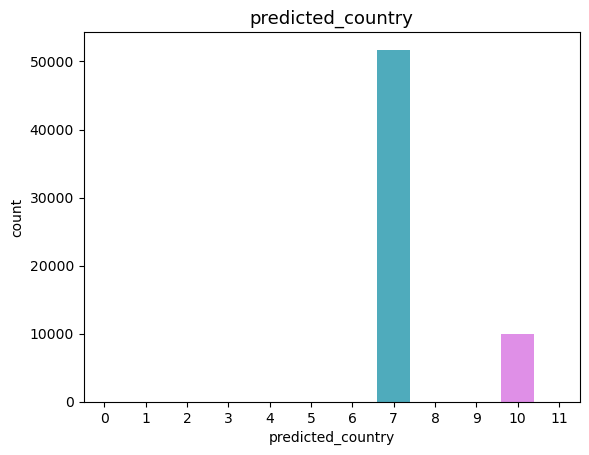

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_country', data=test_data)
plt.title("predicted_country", size=13);

In [104]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)